## Defining the Question

### a) Specifying the Question

Prevalence of Crime Over the past 40 years in the US.

Finding hidden Relationships between Variables in the Dataset.


### b) Defining the Metric for Success

This analysis will be successful if we are able to definitevely identify any hidden relationships between variables in our data and explain the nature of that relationship.

Additionaly, this analysis will be successful if we are able to visualize the prevalence of crime for the past 40 years in the USA.


### c) Understanding the context 

### d) Recording the Experimental Design

Our Analysis will follow the followin steps:
1. Defining our Question
2. Reading our Data
3. Checking our data
4. Cleaning our Data
5. Performing Exploratory Data Analysis
6. Recommendations
7. Conclusion

### e) Data Relevance

## Reading the Data

### Importing our Libraries

In [ ]:
# installing the necessary libraries not in google colab
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [ ]:
# Let us first import all the libraries we will need for our analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport
import plotly.express as px
from scipy.stats import linregress

In [ ]:
# let us set the warnings that may appear in our analysis off

import warnings
warnings.filterwarnings('ignore') 

# subsequently let us set the pandas warning for chained assignments off
pd.options.mode.chained_assignment = None  # default='warn'

### Loading our Dataset

In [ ]:
# Loading the Data from the source i.e. csv
# 

df = pd.read_csv('/content/US Crime Data 1975-2015.csv')

### Previewing the Dataset 

In [ ]:
# previewing the first five entries of the dataset

df.head()

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
0,1975,NM00101,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,12.0,832.52,10.48,63.23,472.68,286.13
1,1975,TX22001,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,12.0,247.16,4.45,24.89,117.36,100.46
2,1975,GAAPD00,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12.0,1637.44,37.71,90.30,717.10,792.32
3,1975,CO00101,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,12.0,523.76,6.00,37.72,333.46,146.58
4,1975,TX22701,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0,12.0,404.46,10.99,63.25,154.13,176.10


In [ ]:
# previewing the last five entries of the dataset

df.tail()

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
2824,2015,OK07205,"Tulsa, OK",401520.0,3628.0,55.0,365.0,2354.0,854.0,NaN,903.57,13.70,90.90,586.27,212.69
2825,2015,VA12800,"Virginia Beach, VA",452797.0,626.0,19.0,103.0,234.0,270.0,NaN,138.25,4.20,22.75,51.68,59.63
2826,2015,DCMPD00,"Washington, DC",672228.0,8084.0,162.0,494.0,4024.0,3404.0,NaN,1202.57,24.10,73.49,598.61,506.38
2827,2015,KS08703,"Wichita, KS",389824.0,3839.0,27.0,349.0,2730.0,733.0,NaN,984.80,6.93,89.53,700.32,188.03
2828,2015,NaN,United States,NaN,1197704.0,15696.0,NaN,NaN,NaN,NaN,372.60,4.90,NaN,NaN,NaN


## Checking the Data

In [ ]:
# Determining the no. of records in our dataset
#
print('This dataset has ' + str(df.shape[0]) + ' rows, and ' + str(df.shape[1]) + ' columns')

This dataset has 2829 rows, and 15 columns


In [ ]:
# Checking whether each column has an appropriate datatype
#
df.dtypes

report_year              int64
agency_code             object
agency_jurisdiction     object
population             float64
violent_crimes         float64
homicides              float64
rapes                  float64
assaults               float64
robberies              float64
months_reported        float64
crimes_percapita       float64
homicides_percapita    float64
rapes_percapita        float64
assaults_percapita     float64
robberies_percapita    float64
dtype: object

In [ ]:
# checking the dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2829 entries, 0 to 2828
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   report_year          2829 non-null   int64  
 1   agency_code          2788 non-null   object 
 2   agency_jurisdiction  2829 non-null   object 
 3   population           2760 non-null   float64
 4   violent_crimes       2794 non-null   float64
 5   homicides            2795 non-null   float64
 6   rapes                2754 non-null   float64
 7   assaults             2753 non-null   float64
 8   robberies            2754 non-null   float64
 9   months_reported      2692 non-null   float64
 10  crimes_percapita     2794 non-null   float64
 11  homicides_percapita  2795 non-null   float64
 12  rapes_percapita      2754 non-null   float64
 13  assaults_percapita   2753 non-null   float64
 14  robberies_percapita  2754 non-null   float64
dtypes: float64(12), int64(1), object(2)
me

In [ ]:
# let us see the columns in our dataframe
df.columns

Index(['report_year', 'agency_code', 'agency_jurisdiction', 'population',
       'violent_crimes', 'homicides', 'rapes', 'assaults', 'robberies',
       'months_reported', 'crimes_percapita', 'homicides_percapita',
       'rapes_percapita', 'assaults_percapita', 'robberies_percapita'],
      dtype='object')

In [ ]:
# Checking the entire profile of the dataframe

profile = ProfileReport(df, title="Crime Dataset Profile Report", html={'style':{'full_width':True}})
profile.to_notebook_iframe()

In [ ]:
# let us save our profile report
profile.to_file(output_file="Crime_Dataset_Profile_Report.html") 

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## 4. Tidying the Dataset

In [ ]:
# let us check for any duplicated data in our dataframe
df.duplicated().sum()

0

In [ ]:
# Dropping columns we will not need for this analysis
# 
df = df.drop(['agency_code','months_reported'], axis = 1)
df.head()

,report_year,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
0,1975,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,832.52,10.48,63.23,472.68,286.13
1,1975,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,247.16,4.45,24.89,117.36,100.46
2,1975,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,1637.44,37.71,90.30,717.10,792.32
3,1975,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,523.76,6.00,37.72,333.46,146.58
4,1975,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0,404.46,10.99,63.25,154.13,176.10


In [ ]:
# Fixing Messy Column Names
#df.columns
#df.rename(columns={}, inplace=True)

In [ ]:
# Removing the spaces and setting all column names to lower case
#df.columns = df.columns.str.lower().str.replace(" ", "_")
#df.head()

In [ ]:
# From our profile report we can see that we have null values 
# Let us juct check for a summary of these missing values
df.isnull().sum()

report_year             0
agency_jurisdiction     0
population             69
violent_crimes         35
homicides              34
rapes                  75
assaults               76
robberies              75
crimes_percapita       35
homicides_percapita    34
rapes_percapita        75
assaults_percapita     76
robberies_percapita    75
dtype: int64

In [ ]:
# dealing with missing data
# let us drop fill these missing values with 0 
df.fillna(value= 0, inplace = True)

In [ ]:
# now let us confirm that our data has no missing data
df.isnull().sum()

report_year            0
agency_jurisdiction    0
population             0
violent_crimes         0
homicides              0
rapes                  0
assaults               0
robberies              0
crimes_percapita       0
homicides_percapita    0
rapes_percapita        0
assaults_percapita     0
robberies_percapita    0
dtype: int64

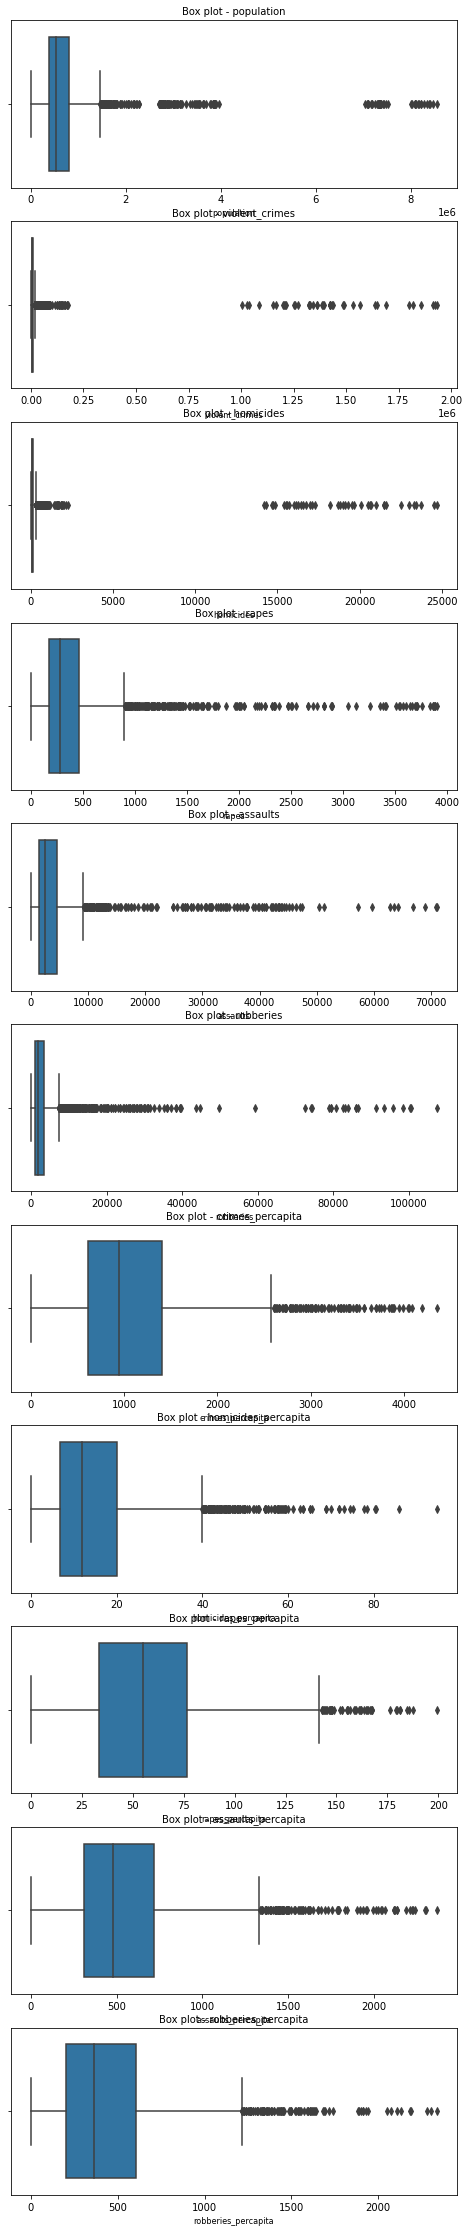

In [ ]:
# Checking for Anomalies
# 
# Checking for outliers in the columns with numerical data
col_names = ['population','violent_crimes', 'homicides', 'rapes', 'assaults',
             'robberies','crimes_percapita','homicides_percapita',
             'rapes_percapita','assaults_percapita','robberies_percapita']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):
    sns.boxplot(df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.show()

In [ ]:
# checking for anormalities
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1
IQR
lower_bound = Q1 - (1.5*IQR)
upper_bound = Q3 + (1.5*IQR)

print('Lower_Bound' +str(lower_bound))
print('Upper_Bound' +str(upper_bound))

Lower_Boundreport_year              1955.000
population            -280168.000
violent_crimes          -6184.000
homicides                -117.500
rapes                    -267.500
assaults                -3272.500
robberies               -2875.000
crimes_percapita         -566.665
homicides_percapita       -13.175
rapes_percapita           -31.435
assaults_percapita       -310.980
robberies_percapita      -408.085
dtype: float64
Upper_Boundreport_year               2035.000
population             1459336.000
violent_crimes           18080.000
homicides                  278.500
rapes                      896.500
assaults                  9163.500
robberies                 7413.000
crimes_percapita          2584.575
homicides_percapita         39.985
rapes_percapita            141.805
assaults_percapita        1338.700
robberies_percapita       1214.515
dtype: float64


In [ ]:
# Removing the outliers

df1 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df1.head()

,report_year,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
0,1975,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,832.52,10.48,63.23,472.68,286.13
1,1975,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,247.16,4.45,24.89,117.36,100.46
2,1975,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,1637.44,37.71,90.30,717.10,792.32
3,1975,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,523.76,6.00,37.72,333.46,146.58
4,1975,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0,404.46,10.99,63.25,154.13,176.10


In [ ]:
# Getting the size of our data set after removing the outliers
df1.shape

# Afer removing the outliers we remain with 2245 rows.

(2245, 13)

In [ ]:
# Removing the outliers will remove alot of data, therefore, we will keep the outliers.
# Furthermore, these outliers seem to be more of a distribution pattern rather than from errors

df.shape


(2829, 13)

# Exploratory Data Analysis

Since our data is mostly numerical, the analysis we perform will be on numerical data only

# Univariate Analysis

In [ ]:
# finding the information about the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2829 entries, 0 to 2828
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   report_year          2829 non-null   int64  
 1   agency_jurisdiction  2829 non-null   object 
 2   population           2829 non-null   float64
 3   violent_crimes       2829 non-null   float64
 4   homicides            2829 non-null   float64
 5   rapes                2829 non-null   float64
 6   assaults             2829 non-null   float64
 7   robberies            2829 non-null   float64
 8   crimes_percapita     2829 non-null   float64
 9   homicides_percapita  2829 non-null   float64
 10  rapes_percapita      2829 non-null   float64
 11  assaults_percapita   2829 non-null   float64
 12  robberies_percapita  2829 non-null   float64
dtypes: float64(11), int64(1), object(1)
memory usage: 287.4+ KB


Text(0, 0.5, 'violent_crimes')

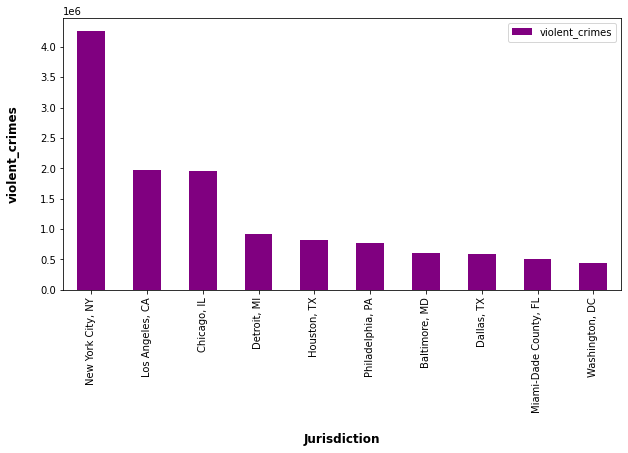

In [ ]:
# let us find out which 10 jurisdictions have recorded the most violent crimes in USA
q= np.where(df['agency_jurisdiction']!='United States')
q1 = df.loc[q]
p = q1.groupby('agency_jurisdiction')[['violent_crimes']].sum().sort_values('violent_crimes', ascending= False).reset_index().head(10)

# let us now plot these countries on a bar graph
x = p.plot.bar(x='agency_jurisdiction', y='violent_crimes', figsize=(10,5), color='#800080')

# Set x-axis label
x.set_xlabel("Jurisdiction", labelpad=20, weight='bold', size=12)

  # Set y-axis label
x.set_ylabel("violent_crimes", labelpad=20, weight='bold', size=12)

#New York leads the country in prevalence of violent crimes

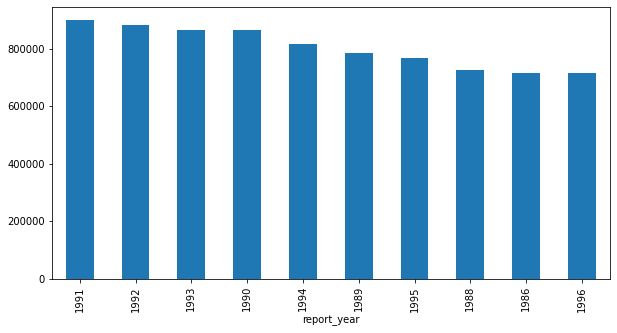

In [ ]:
crimes = q1.groupby('report_year')['violent_crimes'].sum().sort_values(ascending=False).head(10)
crimes.plot(kind='bar',figsize=(10,5))
# we can see that violent crimes in the USA were more prevalent during the 90s

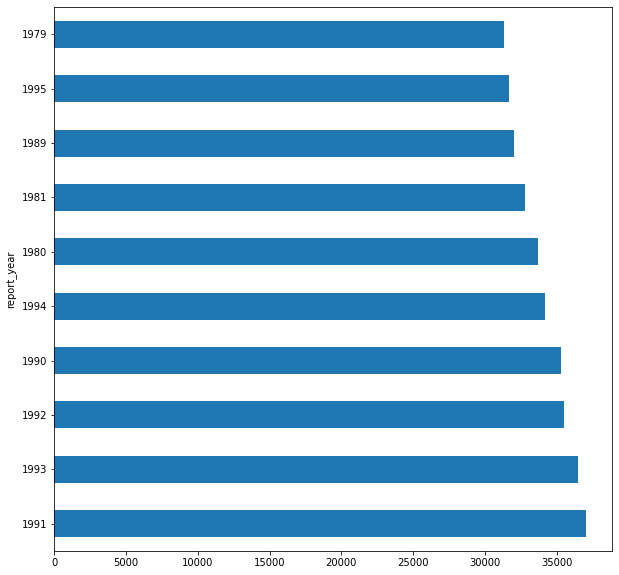

In [ ]:
homicides = df.groupby('report_year')['homicides'].sum().sort_values(ascending=False).head(10)
homicides.plot(kind='barh',figsize=(10,10))

# we can see that homicides in the USA were more prevalent during the 90s

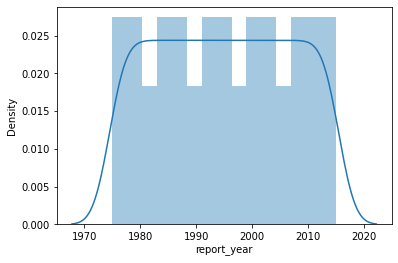

In [ ]:
# let us now create a histogram to to show the distribution of year

sns.distplot(df['report_year'], kde=True)

# the histogram shows us that the year distribution is symmetrically 
# meaning that it is normally distributed
# meaning that the mean is equal to mode is equal to median

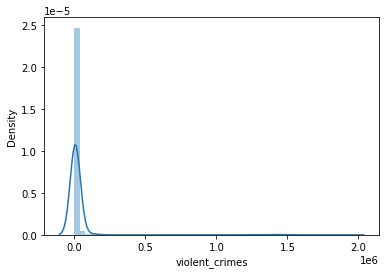

In [ ]:
# let us now create a histogram to to show the distribution of violent crimes

sns.distplot(df['violent_crimes'], kde=True)
# the histogram shows us that the violent_crimes distribution is skewed to the right
# meaning that the mean is greater than the mode 

### c) Summary Statistics

In [ ]:
df.describe(include= 'all')

,report_year,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
count,2829.000000,2829,2.829000e+03,2.829000e+03,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000
unique,NaN,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,"Tulsa, OK",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1995.000000,NaN,7.762908e+05,2.926594e+04,393.597384,405.242842,4286.803464,3894.194062,1079.526748,15.188056,57.732920,551.374065,447.773835
std,11.834251,NaN,1.007530e+06,1.718212e+05,2267.937118,478.108571,6919.668808,8562.537239,683.451594,12.389975,32.952618,375.781122,344.376744
min,1975.000000,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1985.000000,NaN,3.721460e+05,2.915000e+03,31.000000,169.000000,1391.000000,983.000000,615.050000,6.760000,33.530000,307.650000,200.390000
50%,1995.000000,NaN,5.252470e+05,5.080000e+03,63.000000,283.000000,2524.000000,1871.000000,942.010000,11.830000,54.880000,478.520000,361.710000
75%,2005.000000,NaN,8.070220e+05,8.981000e+03,130.000000,460.000000,4500.000000,3555.000000,1402.860000,20.050000,76.840000,720.070000,606.040000


In [ ]:
# calculating the mean of the dataset

df.mean()

report_year              1995.000000
population             776290.818664
violent_crimes          29265.935313
homicides                 393.597384
rapes                     405.242842
assaults                 4286.803464
robberies                3894.194062
crimes_percapita         1079.526748
homicides_percapita        15.188056
rapes_percapita            57.732920
assaults_percapita        551.374065
robberies_percapita       447.773835
dtype: float64

In [ ]:
# calculating the median of the dataset

df.median()

report_year              1995.00
population             525247.00
violent_crimes           5080.00
homicides                  63.00
rapes                     283.00
assaults                 2524.00
robberies                1871.00
crimes_percapita          942.01
homicides_percapita        11.83
rapes_percapita            54.88
assaults_percapita        478.52
robberies_percapita       361.71
dtype: float64

In [ ]:
# Finding the standard deviation 

df.std()

# The standard deviations shows the ranges, in that the values with more range show higher
# values of standard deviation, meaning the data is more spread away from the mean.

report_year            1.183425e+01
population             1.007530e+06
violent_crimes         1.718212e+05
homicides              2.267937e+03
rapes                  4.781086e+02
assaults               6.919669e+03
robberies              8.562537e+03
crimes_percapita       6.834516e+02
homicides_percapita    1.238998e+01
rapes_percapita        3.295262e+01
assaults_percapita     3.757811e+02
robberies_percapita    3.443767e+02
dtype: float64

In [ ]:
# finding the variance 

df.var()

report_year            1.400495e+02
population             1.015117e+12
violent_crimes         2.952254e+10
homicides              5.143539e+06
rapes                  2.285878e+05
assaults               4.788182e+07
robberies              7.331704e+07
crimes_percapita       4.671061e+05
homicides_percapita    1.535115e+02
rapes_percapita        1.085875e+03
assaults_percapita     1.412115e+05
robberies_percapita    1.185953e+05
dtype: float64

In [ ]:
# finding the skewness 

df.skew()


report_year            0.000000
population             5.103704
violent_crimes         8.416617
homicides              8.368507
rapes                  4.069075
assaults               5.107345
robberies              7.446723
crimes_percapita       1.223341
homicides_percapita    1.728443
rapes_percapita        0.672116
assaults_percapita     1.240024
robberies_percapita    1.492504
dtype: float64

In [ ]:
# finding the kurtosis of the dataset

df.kurt()

# The data has positve kurtosis meaning the data has extreme outliers

report_year            -1.201431
population             30.674008
violent_crimes         71.723551
homicides              70.459447
rapes                  21.217849
assaults               31.718333
robberies              67.430464
crimes_percapita        2.086588
homicides_percapita     4.068674
rapes_percapita         0.588409
assaults_percapita      2.194798
robberies_percapita     3.091915
dtype: float64

# Bivariate Analysis

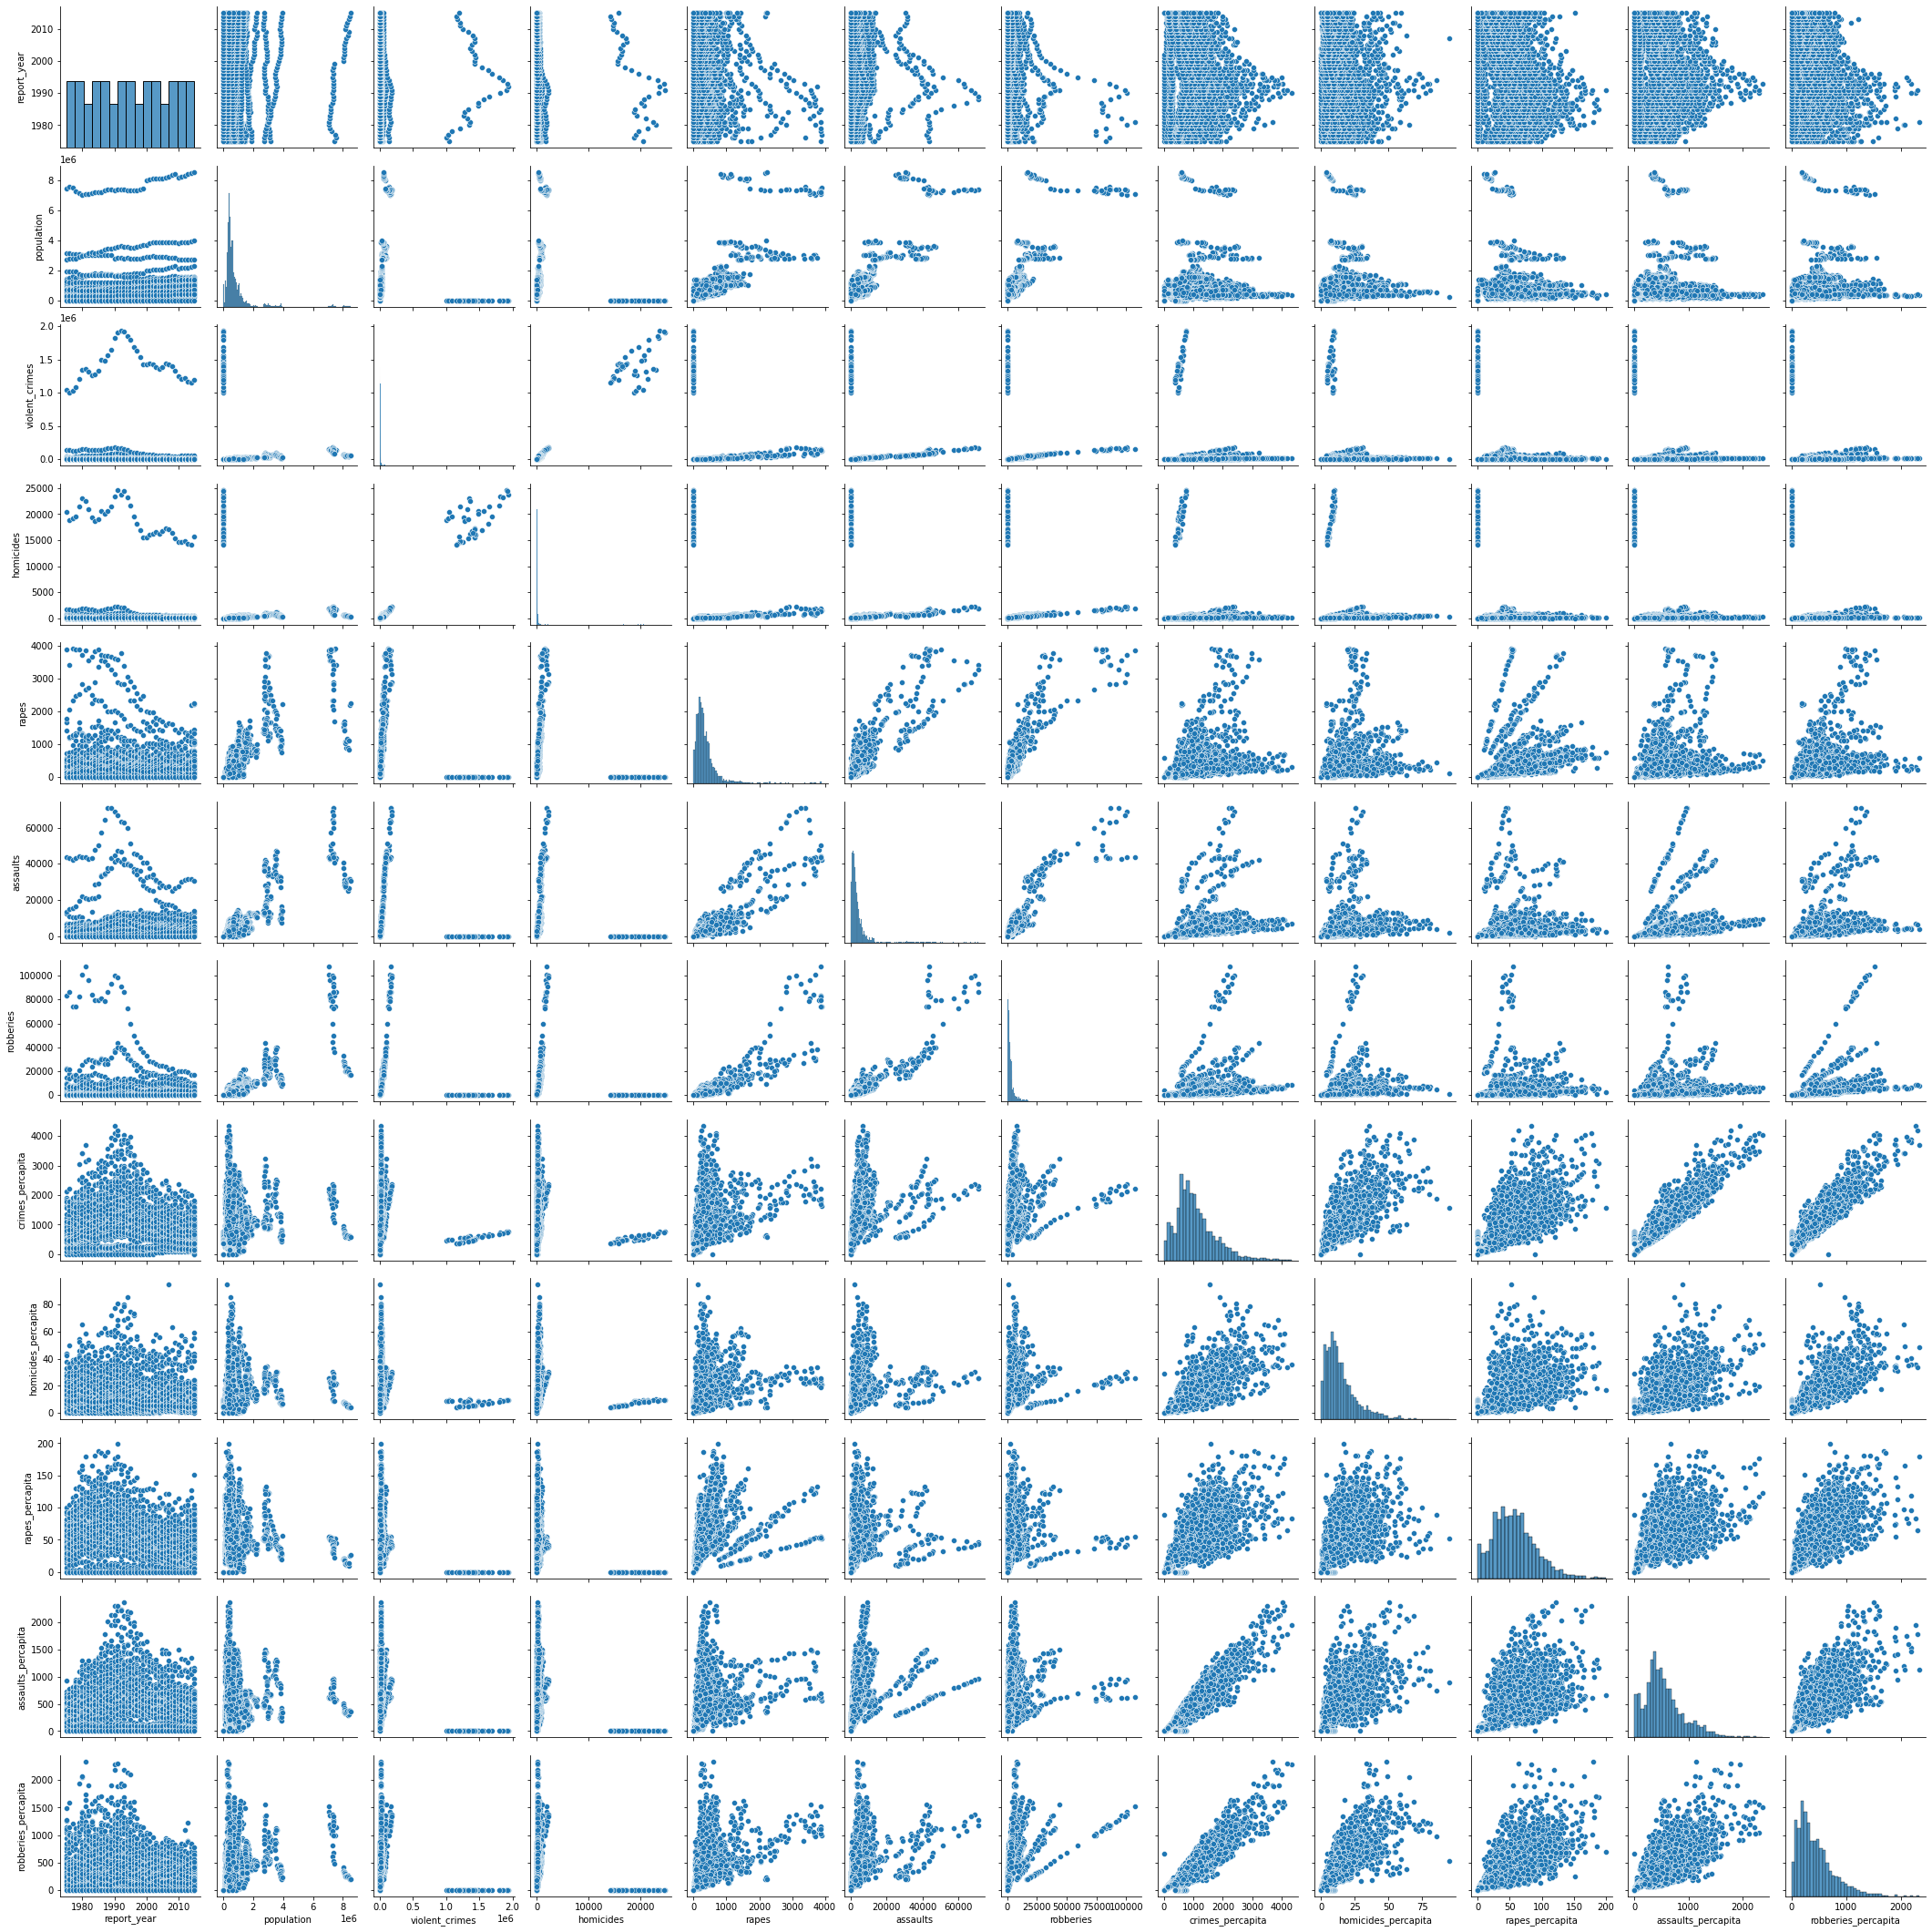

In [ ]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(df)
plt.show()

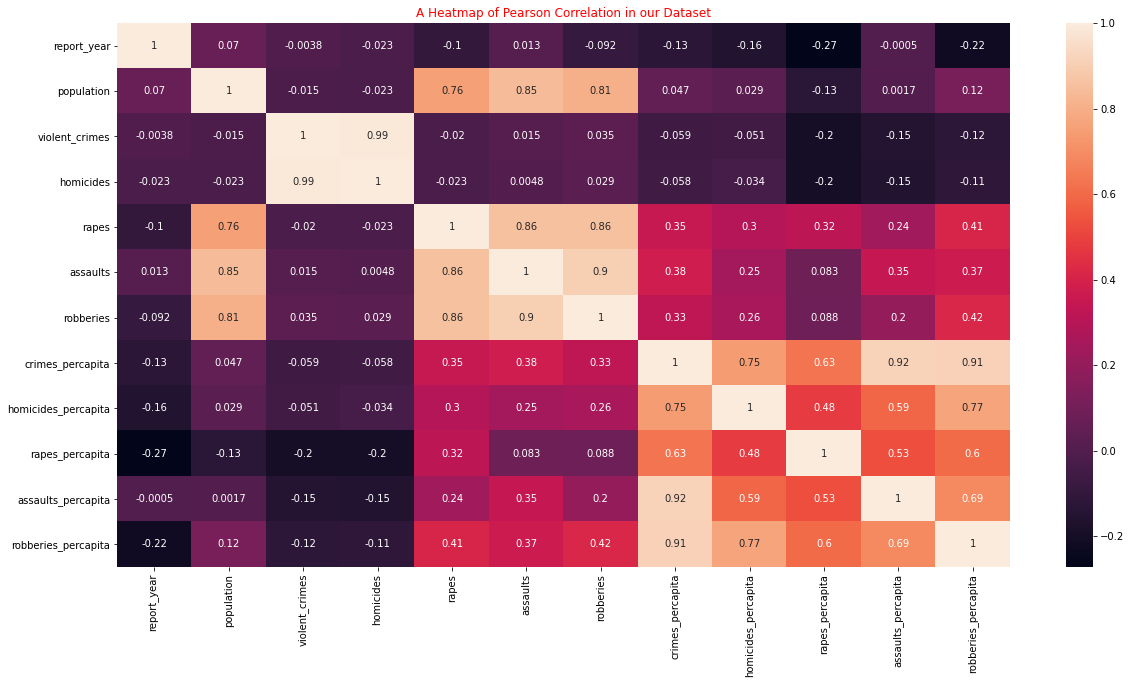

In [ ]:
# Calculating the pearson coefficient
a = df.corr() 
plt.figure(figsize = (20,10))
sns.heatmap(a, xticklabels=a.columns, yticklabels=a.columns, annot=True)
plt.title('A Heatmap of Pearson Correlation in our Dataset', color='red')
plt.show()

In [ ]:
# there is a high positive correlation between population and rapes, population and assaults & population and robberies.
# there is a high positive correlation between roberries and rapes, & robberies and assaults
# there is a high positive correlation between assaults and rapes.

Let us Investigate these relatioships further

Let us declare a null and alternate hypothesis:
Null Hypothesis: There is no statistically significant relationship between the variables

Alternate Hypotheis: There is a statistically significant relationship between the variables

We will use the linregress function to test our hypothesis.

This function Calculates a linear least-squares regression for two sets of measurements.

The return value is an object with the following attributes:

slopefloat- Slope of the regression line.

interceptfloat- Intercept of the regression line.

rvaluefloat- Correlation coefficient.

pvaluefloat- Two-sided p-value for a hypothesis test whose null hypothesis is that the slope is zero, using Wald Test with t-distribution of the test statistic.

stderrfloat- Standard error of the estimated slope (gradient), under the assumption of residual normality.

intercept_stderrfloat- Standard error of the estimated intercept, under the assumption of residual normality.

### Population and Rapes

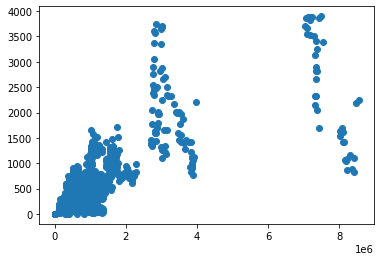

In [ ]:
plt.scatter(df['population'], df['rapes'])
plt.show()

In [ ]:
# calculating the correlation coefficient
np.corrcoef(df['population'], df['rapes'])

array([[1.        , 0.75555025],
       [0.75555025, 1.        ]])

In [ ]:
# The value of 0.76 shows a strong positive linear relationship between the two variables. 
# Let’s confirm this with the linear regression correlation test, 
# which is done in Python with the linregress() function in the scipy.stats module.
linregress(df['population'], df['rapes'])

LinregressResult(slope=0.0003585352328833888, intercept=126.91523253876136, rvalue=0.7555502474632393, pvalue=0.0, stderr=5.846648926171248e-06)

In [ ]:
# Since the p-value of 0.0 is less than 0.05, 
# we reject the null hypothesis.
# Therefore there is a relationship between the population and number of rapes.

### Population and Assaults

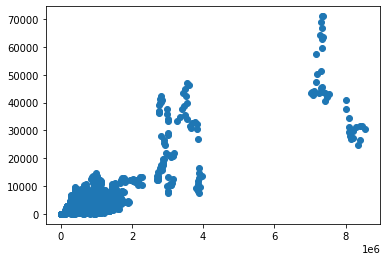

In [ ]:
plt.scatter(df['population'], df['assaults'])
plt.show()

In [ ]:
# calculating the correlation coefficient
np.corrcoef(df['population'], df['assaults'])

array([[1.        , 0.84596819],
       [0.84596819, 1.        ]])

In [ ]:
# The value of 0.84 shows a strong positive linear relationship between the two variables. 
# Let’s confirm this with the linear regression correlation test, 
# which is done in Python with the linregress() function in the scipy.stats module.
linregress(df['population'], df['assaults'])

LinregressResult(slope=0.005810069117139464, intercept=-223.4998473160831, rvalue=0.8459681876851136, pvalue=0.0, stderr=6.887818293766508e-05)

In [ ]:
# Since the p-value of 0.0 is less than 0.05, 
# we reject the null hypothesis.
# Therefore there is a relationship between the population and number of assaults.

### Population and Robberies

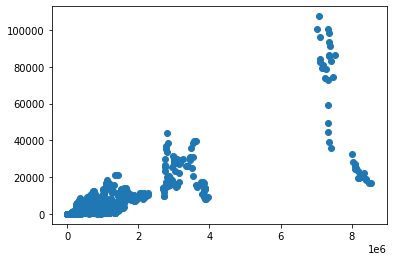

In [ ]:
plt.scatter(df['population'], df['robberies'])
plt.show()

In [ ]:
# calculating the correlation coefficient
np.corrcoef(df['population'], df['robberies'])

array([[1.        , 0.80624848],
       [0.80624848, 1.        ]])

In [ ]:
# The value of 0.81 shows a strong positive linear relationship between the two variables. 
# Let’s confirm this with the linear regression correlation test, 
# which is done in Python with the linregress() function in the scipy.stats module.
linregress(df['population'], df['robberies'])

LinregressResult(slope=0.006851936652893343, intercept=-1424.9014522015045, rvalue=0.806248477527007, pvalue=0.0, stderr=9.4556815237071e-05)

In [ ]:
# Since the p-value of 0.0 is less than 0.05, 
# we reject the null hypothesis.
# Therefore there is a relationship between the population and number of robberies.

### Robberies and Rapes

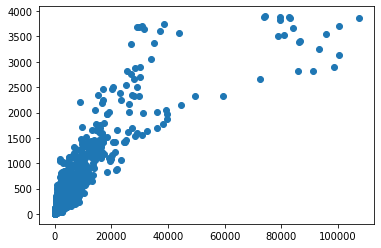

In [ ]:
plt.scatter(df['robberies'], df['rapes'])
plt.show()

In [ ]:
# calculating the correlation coefficient
np.corrcoef(df['robberies'], df['rapes'])

array([[1.        , 0.85707888],
       [0.85707888, 1.        ]])

In [ ]:
# The value of 0.86 shows a strong positive linear relationship between the two variables. 
# Let’s confirm this with the linear regression correlation test, 
# which is done in Python with the linregress() function in the scipy.stats module.
linregress(df['robberies'], df['rapes'])

LinregressResult(slope=0.04785693173641034, intercept=218.87866262381817, rvalue=0.8570788834734092, pvalue=0.0, stderr=0.0005410339620991957)

In [ ]:
# Since the p-value of 0.0 is less than 0.05, 
# we reject the null hypothesis.
# Therefore there is a relationship between the number of robberies and number of rapes.

### Robberies and Assaults

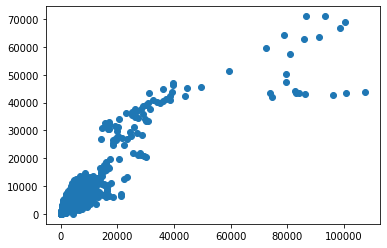

In [ ]:
plt.scatter(df['robberies'], df['assaults'])
plt.show()

In [ ]:
# calculating the correlation coefficient
np.corrcoef(df['robberies'], df['assaults'])

array([[1.        , 0.90193831],
       [0.90193831, 1.        ]])

In [ ]:
# The value of 0.90 shows a strong positive linear relationship between the two variables. 
# Let’s confirm this with the linear regression correlation test, 
# which is done in Python with the linregress() function in the scipy.stats module.
linregress(df['robberies'], df['assaults'])

LinregressResult(slope=0.7288860994988028, intercept=1448.379543939211, rvalue=0.9019383070060703, pvalue=0.0, stderr=0.006563988890494786)

In [ ]:
# Since the p-value of 0.0 is less than 0.05, 
# we reject the null hypothesis.
# Therefore there is a relationship between the number of robberies and number of assaults.

### Assaults and Rapes

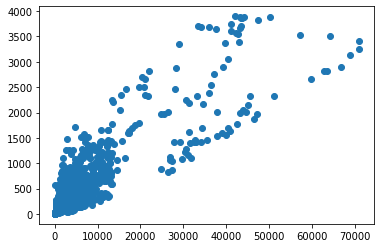

In [ ]:
plt.scatter(df['assaults'], df['rapes'])
plt.show()

In [ ]:
# calculating the correlation coefficient
np.corrcoef(df['assaults'], df['rapes'])

array([[1.        , 0.85770949],
       [0.85770949, 1.        ]])

In [ ]:
# The value of 0.86 shows a strong positive linear relationship between the two variables. 
# Let’s confirm this with the linear regression correlation test, 
# which is done in Python with the linregress() function in the scipy.stats module.
linregress(df['assaults'], df['rapes'])

LinregressResult(slope=0.05926270012721762, intercept=151.19529379508137, rvalue=0.8577094879919623, pvalue=0.0, stderr=0.0006681210993665196)

In [ ]:
# Since the p-value of 0.0 is less than 0.05, 
# we reject the null hypothesis.
# Therefore there is a relationship between the number of assaults and number of rapes.

## Bivariate Analysis Conclusions

From the Bivariate analysis and testing the hypothesis we can conclude that:

The higher the population, the higher the cases of Robberies, Rapes and assaults.

As the number of robberies increase, so does the number of assaults and rapes.

As the number of assaults increases, so does the number of rapes and robberies.

This suggests that most robberies probably results in the victims being assaulted and, or raped and that most assaults also lead to victims being robbed and, or raped.


# MULTIVARIATE ANALYSIS

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2829 entries, 0 to 2828
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   report_year          2829 non-null   int64  
 1   agency_jurisdiction  2829 non-null   object 
 2   population           2829 non-null   float64
 3   violent_crimes       2829 non-null   float64
 4   homicides            2829 non-null   float64
 5   rapes                2829 non-null   float64
 6   assaults             2829 non-null   float64
 7   robberies            2829 non-null   float64
 8   crimes_percapita     2829 non-null   float64
 9   homicides_percapita  2829 non-null   float64
 10  rapes_percapita      2829 non-null   float64
 11  assaults_percapita   2829 non-null   float64
 12  robberies_percapita  2829 non-null   float64
dtypes: float64(11), int64(1), object(1)
memory usage: 287.4+ KB


## Principal Component Analysis (PCA)

In [ ]:
df_pca = df.copy(deep=True)

In [ ]:
# Data for label encoding
df_pca['population'] = df_pca['population'].astype('category')
df_pca['violent_crimes'] = df_pca['violent_crimes'].astype('category')
df_pca['rapes'] = df_pca['rapes'].astype('category')
df_pca['assaults'] = df_pca['assaults'].astype('category')
df_pca['robberies'] = df_pca['robberies'].astype('category')

In [ ]:
# Label encoding the categorical data

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

df_pca['population'] = labelencoder.fit_transform(df_pca['population'])
df_pca['violent_crimes'] = labelencoder.fit_transform(df_pca['violent_crimes'])
df_pca['rapes'] = labelencoder.fit_transform(df_pca['rapes'])
df_pca['assaults'] = labelencoder.fit_transform(df_pca['assaults'])
df_pca['robberies'] = labelencoder.fit_transform(df_pca['robberies'])

In [ ]:
x = df_pca.drop(['population', 'agency_jurisdiction'], axis= 1) # features
y = df_pca['population'] #target variable

In [ ]:
# Splitting the data into train and test sets

from sklearn.model_selection import  train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [ ]:
# Performing standard scalar normalization to normalize our feature set.

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train =sc.fit_transform(x_train)
x_test = sc.transform (x_test)

In [ ]:
# Applying PCA
# We did not specify the number of components in the constructor. 
# Hence, the features in Financial_encoding set will be returned for both the training and test sets.

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(x_train)
X_test = pca.transform(x_test)

In [ ]:
# Explained Variance Ratio

explained_variance = pca.explained_variance_ratio_
explained_variance

array([5.43652983e-01, 1.28632448e-01, 1.04329636e-01, 9.28577130e-02,
       5.26388026e-02, 4.48341730e-02, 2.26080626e-02, 6.41960451e-03,
       3.47635635e-03, 5.44244669e-04, 5.97688038e-06])

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2829 entries, 0 to 2828
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   report_year          2829 non-null   int64  
 1   violent_crimes       2829 non-null   int64  
 2   homicides            2829 non-null   float64
 3   rapes                2829 non-null   int64  
 4   assaults             2829 non-null   int64  
 5   robberies            2829 non-null   int64  
 6   crimes_percapita     2829 non-null   float64
 7   homicides_percapita  2829 non-null   float64
 8   rapes_percapita      2829 non-null   float64
 9   assaults_percapita   2829 non-null   float64
 10  robberies_percapita  2829 non-null   float64
dtypes: float64(6), int64(5)
memory usage: 243.2 KB


In [ ]:
x.columns

Index(['report_year', 'violent_crimes', 'homicides', 'rapes', 'assaults',
       'robberies', 'crimes_percapita', 'homicides_percapita',
       'rapes_percapita', 'assaults_percapita', 'robberies_percapita'],
      dtype='object')

In [ ]:
# The explained variance ratio is the percentage of variance that is attributed by each of the selected components. 
# Ideally, you would choose the number of components to include in your model by adding the explained variance ratio 
# of each component until you reach a total of around 0.8 or 80% to avoid overfitting.

cols = [5.43652983e-01+1.28632448e-01+1.04329636e-01+ 9.28577130e-02]

cols
# This suggests that we can use 4 principal components for our analysis.
# From the above experimentation we can achieve optimal level of accuracy while significantly reducing the number of features in the dataset

[0.86947278]

Confirming some things

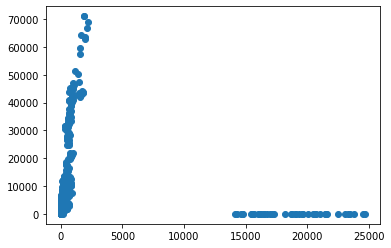

In [ ]:
plt.scatter(df['homicides'], df['assaults'])
plt.show()

In [ ]:
# calculating the correlation coefficient
np.corrcoef(df['homicides'], df['assaults'])

array([[1.        , 0.00483356],
       [0.00483356, 1.        ]])

In [ ]:
# The value of 0.04 shows a very weak positive linear relationship between the two variables. 
# Let’s confirm this with the linear regression correlation test, 
# which is done in Python with the linregress() function in the scipy.stats module.
linregress(df['homicides'], df['assaults'])

LinregressResult(slope=0.01474758780530004, intercept=4280.99885213766, rvalue=0.0048335552916233685, pvalue=0.7971967698876409, stderr=0.05738340597685924)

In [ ]:
# Since the p-value of 0.79 is greater than 0.05, 
# we fail to reject the null hypothesis.
# Therefore there is no relationship between the number of homicides and number of assaults.